# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fadhil Pratama Siregar
- **Email:** pratamafadil13@gmail.com
- **ID Dicoding:** fadhilsrg

## Menentukan Pertanyaan Bisnis

- Apakah tren penggunaan sepeda meningkat dari tahun 2011 ke 2012?
- Bagaimana tren penggunaan sepeda berdasarkan jam dari tahun 2011 ke 2012, dan kapan waktu paling kritis untuk memastikan ketersediaan sepeda guna memenuhi lonjakan permintaan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kita telah memuat tabel day.csv yang diberi nama day_df
- Kita telah memuat tabel hour.csv yang diberi nama hour_df

### Assessing Data

In [5]:
day_df.info()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
hour_df.info()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Pada tabel "day" saya mendapatkan bahwa, tidak ada data yang null, dan tidak ada data yang terduplikasi. Tetapi, ada kejanggalan dimana kolom "dteday" Mempunyai data type object buka datetime
- Pada tabel "hour" saya mendapatkan, tidak ada data yang null juga, dan sama sekali tidak ada data yang terduplikasi. Tetapi, ada kejanggalan dimana kolom "dteday" Mempunyai data type object buka datetime

### Cleaning Data

In [8]:
if "dteday" in day_df.columns:
    day_df["dteday"] = pd.to_datetime(day_df["dteday"])

if "dteday" in hour_df.columns:
    hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

print(day_df.info())
print(hour_df.info())

day_df.to_csv("day_data_clean.csv", index=False)
hour_df.to_csv("hour_data_clean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Saya berhasil mengubah kedua tabel pada kolom "dteday" data typenya dari "object" berubah menjadi "datetime"

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekly_avg
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,725.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,4527.936552
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1022.714286
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,3344.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,4470.142857
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,6123.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,7988.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,1740.978997


In [13]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Total Penyewaan Sepeda per Tahun:
year
2011    1243103
2012    2049576
Name: cnt, dtype: int64


<Figure size 800x400 with 0 Axes>

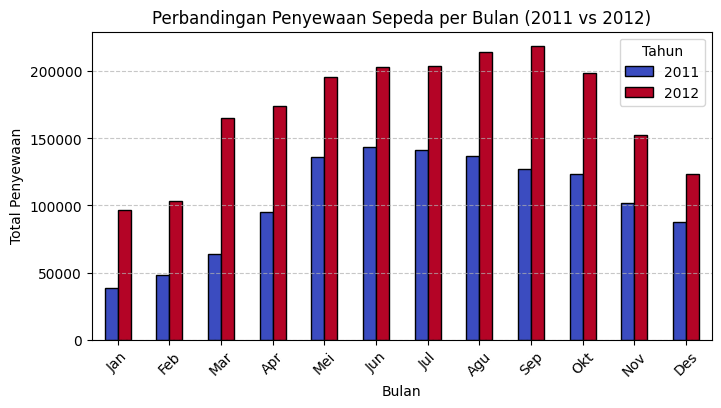

In [16]:
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month

yearly_rentals = day_df.groupby('year')['cnt'].sum()
print("Total Penyewaan Sepeda per Tahun:")
print(yearly_rentals)

monthly_rentals = day_df.groupby(['year', 'month'])['cnt'].sum().unstack(level=0)

plt.figure(figsize=(8, 4))
monthly_rentals.plot(kind='bar', figsize=(8, 4), colormap='coolwarm', edgecolor='black')
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan")
plt.title("Perbandingan Penyewaan Sepeda per Bulan (2011 vs 2012)")
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=45)
plt.legend(title="Tahun")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

In [21]:
print("Tabel perhitungan total rental berdasarkan jam (2011-2012):")

hourly_rentals = hour_df.groupby("hr")["cnt"].sum().reset_index()

hourly_rentals_sorted = hourly_rentals.sort_values(by="cnt", ascending=False).reset_index(drop=True)

hourly_rentals_sorted.insert(0, "Rank", range(1, len(hourly_rentals_sorted) + 1))

peak_hours = hourly_rentals_sorted.iloc[:5]
low_hours = hourly_rentals_sorted.iloc[-5:]

print("\n5 Jam dengan penyewaan tertinggi:")
print(tabulate(peak_hours, headers=["Rank", "Hour", "Total Rentals"], tablefmt="grid"))

print("\n5 Jam dengan penyewaan terendah:")
print(tabulate(low_hours, headers=["Rank", "Hour", "Total Rentals"], tablefmt="grid"))


Tabel perhitungan total rental berdasarkan jam (2011-2012):

5 Jam dengan penyewaan tertinggi:
+----+--------+--------+-----------------+
|    |   Rank |   Hour |   Total Rentals |
+====+========+========+=================+
|  0 |      1 |     17 |          336860 |
+----+--------+--------+-----------------+
|  1 |      2 |     18 |          309772 |
+----+--------+--------+-----------------+
|  2 |      3 |      8 |          261001 |
+----+--------+--------+-----------------+
|  3 |      4 |     16 |          227748 |
+----+--------+--------+-----------------+
|  4 |      5 |     19 |          226789 |
+----+--------+--------+-----------------+

5 Jam dengan penyewaan terendah:
+----+--------+--------+-----------------+
|    |   Rank |   Hour |   Total Rentals |
+====+========+========+=================+
| 19 |     20 |      1 |           24164 |
+----+--------+--------+-----------------+
| 20 |     21 |      2 |           16352 |
+----+--------+--------+-----------------+
| 21 |     

**Insight:**
- Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi. Jumlah penyewa tersedikit dalam 1 hari adalah 22, sedangkan Berdasarkan jam penyewa tersedikit adalah 1. Dengan Maksimal penyewa sepeda dalam 1 hari sebanyak 8714, sedangkan 1 jam sebanyak 977.

- Berdasarkan hasil analisis, tren penggunaan sepeda mengalami peningkatan dari tahun 2011 ke 2012. Hal ini terlihat dari total penyewaan sepeda per tahun yang lebih tinggi pada 2012 dibandingkan dengan 2011. Selain itu, visualisasi perbandingan bulanan menunjukkan adanya peningkatan signifikan dalam jumlah penyewaan pada sebagian besar bulan di tahun 2012, menandakan tren yang terus meningkat. Dengan demikian, dapat disimpulkan bahwa permintaan terhadap layanan penyewaan sepeda semakin meningkat pada tahun 2012 dibandingkan tahun sebelumnya.

- Berdasarkan analisis jumlah penyewaan sepeda berdasarkan jam selama tahun 2011 hingga 2012, tren menunjukkan bahwa penggunaan sepeda meningkat signifikan pada jam sibuk, yakni pukul 07:00 - 09:00 pagi dan 17:00 - 19:00 sore, yang bertepatan dengan waktu berangkat dan pulang kerja. Sebaliknya, penyewaan terendah terjadi pada pukul 00:00 - 05:00, mencerminkan minimnya aktivitas pada jam tersebut. Oleh karena itu, strategi optimal mencakup penambahan sepeda di lokasi strategis sebelum jam sibuk untuk mengakomodasi lonjakan permintaan serta penyesuaian distribusi sepeda pada jam rendah guna menghemat sumber daya operasional tanpa mengurangi efisiensi layanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

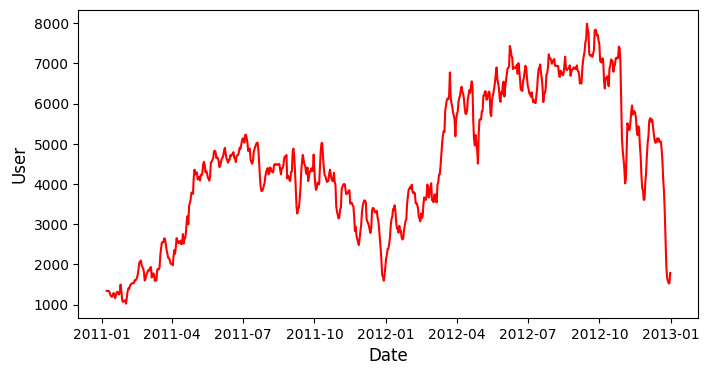

In [ ]:
day_df['weekly_avg'] = day_df['cnt'].rolling(7).mean()
plt.figure(figsize=(8, 4))
plt.plot(day_df['dteday'], day_df['weekly_avg'], color='red')
plt.xlabel('Date', size=12)
plt.ylabel('User', size=12)
plt.show()


**Insight:**
- Visualisasi tren mingguan dengan line plot membantu dalam memahami fluktuasi jumlah penyewaan sepeda dari waktu ke waktu. Dengan memplot rata-rata bergulir 7 hari, pola musiman atau tren jangka panjang dapat terlihat lebih jelas, memberikan wawasan mengenai periode dengan tingkat penyewaan tertinggi atau terendah.

### Pertanyaan 2:

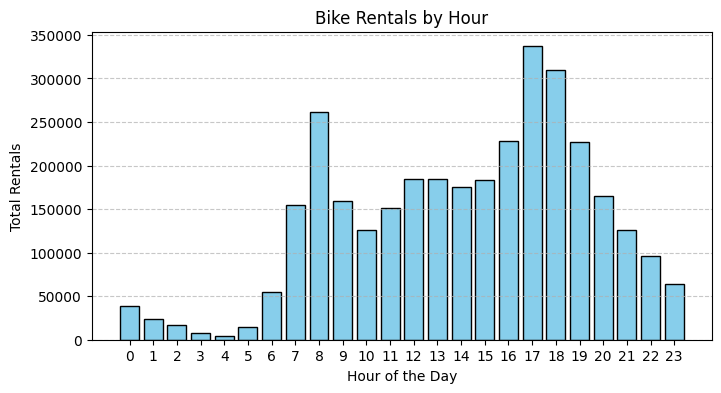

In [ ]:
hourly_rentals = hour_df.groupby("hr")["cnt"].sum()
plt.figure(figsize=(8, 4))
plt.bar(hourly_rentals.index, hourly_rentals.values, color="skyblue", edgecolor="black")

plt.xlabel("Hour of the Day", fontsize=10)
plt.ylabel("Total Rentals", fontsize=10)
plt.title("Bike Rentals by Hour", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Insight:**
- visualisasi jumlah penyewaan berdasarkan jam menggunakan bar chart menunjukkan distribusi penyewaan sepanjang hari. Grafik ini membantu mengidentifikasi jam-jam sibuk dengan permintaan tinggi, yang dapat digunakan untuk pengelolaan ketersediaan sepeda.

## Analisis Lanjutan (Opsional)

In [ ]:
def categorize_season(season):
    season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    return season_mapping.get(season, 'Unknown')

day_df['season_group'] = day_df['season'].apply(categorize_season)

def categorize_weather(weathersit):
    if weathersit == 1:
        return 'Good'
    elif weathersit == 2:
        return 'Moderate'
    elif weathersit in [3, 4]:
        return 'Bad'
    else:
        return 'Unknown'

day_df['weather_group'] = day_df['weathersit'].apply(categorize_weather)

day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Workday' if x == 1 else 'Weekend/Holiday')

def categorize_rental(cnt):
    if cnt < 4000:
        return 'Low'
    elif 4000 <= cnt < 6000:
        return 'Medium'
    else:
        return 'High'

day_df['rental_group'] = day_df['cnt'].apply(categorize_rental)

print(day_df[['season', 'season_group', 'weathersit', 'weather_group', 'workingday', 'day_type', 'cnt', 'rental_group']].sample(10, random_state=42))


     season season_group  weathersit weather_group  workingday  \
703       4       Winter           1          Good           1   
33        1       Spring           1          Good           1   
300       4       Winter           2      Moderate           1   
456       2       Summer           2      Moderate           0   
633       4       Winter           1          Good           1   
557       3         Fall           1          Good           1   
39        1       Spring           2      Moderate           1   
356       1       Spring           1          Good           1   
559       3         Fall           2      Moderate           1   
514       2       Summer           1          Good           1   

            day_type   cnt rental_group  
703          Workday  6606         High  
33           Workday  1550          Low  
300          Workday  3747          Low  
456  Weekend/Holiday  6041         High  
633          Workday  7538         High  
557          Workday 

**Insight:**
- Saya melakukan analisis lanjutan menggunakan metode Clustering, yaitu manual group

- Saya mengelompokkan dataset berdasarkan beberapa karakteristik pada file Readme.

- Kategori yang Dibuat:
Musim (season_group) → Mengubah kode numerik menjadi label deskriptif (Spring, Summer, Fall, Winter).
Kondisi Cuaca (weather_group) → Mengklasifikasikan cuaca menjadi Good, Moderate, Bad berdasarkan kode.
Jenis Hari (day_type) → Menentukan apakah hari tersebut Workday atau Weekend/Holiday.
Jumlah Penyewaan (rental_group) → Mengelompokkan jumlah peminjaman sepeda menjadi Low, Medium, High.

- Menampilkan Sampel Acak:
Saya menggunakan df.sample(10, random_state=42) untuk mengambil 10 baris acak secara reproducible.
Ini membantu melihat distribusi data tanpa bias terhadap urutan data asli.

## Conclusion

- Conclusion pertanyaan 1 : Berdasarkan grafik, tren penggunaan sepeda menunjukkan peningkatan dari tahun 2011 ke 2012. Terlihat bahwa jumlah pengguna secara keseluruhan meningkat, terutama setelah awal 2012, dengan lonjakan yang lebih signifikan dibandingkan tahun sebelumnya. Meskipun terdapat fluktuasi musiman, tren umum menunjukkan pertumbuhan jumlah penyewaan hingga mencapai puncaknya pada pertengahan hingga akhir 2012 sebelum mengalami penurunan tajam menjelang akhir tahun. Hal ini dapat mengindikasikan faktor musiman atau eksternal yang mempengaruhi permintaan penyewaan sepeda.

- Conclusion pertanyaan 2 : Berdasarkan data tren penggunaan sepeda dari tahun 2011 ke 2012, terlihat pola yang konsisten dengan lonjakan permintaan pada pukul 7-9 pagi dan 17-19 sore, yang kemungkinan besar dipengaruhi oleh aktivitas komuter seperti perjalanan ke tempat kerja atau sekolah. Untuk memastikan ketersediaan sepeda selama jam-jam sibuk tersebut, langkah strategis perlu diterapkan, seperti menambah jumlah sepeda di lokasi strategis sebelum periode lonjakan serta memastikan setiap sepeda dalam kondisi baik dan siap digunakan. Di sisi lain, permintaan sepeda cenderung rendah pada rentang waktu 00:00 hingga 05:00, sehingga distribusi sepeda dapat disesuaikan atau dikurangi guna menghemat sumber daya operasional tanpa mengurangi kualitas layanan secara keseluruhan. Dengan memahami pola ini, optimalisasi ketersediaan sepeda dapat dilakukan agar layanan lebih efisien dan mampu memenuhi lonjakan permintaan dengan baik.